In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_linnerud

liner = load_linnerud()
df_data = pd.DataFrame(liner.data, columns=liner.feature_names)
df_target = pd.DataFrame(liner.target, columns=liner.target_names)
df = pd.concat((df_data, df_target), axis=1)
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [109]:
X = df_data
y = df['Waist']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'elu', input_shape = (3,)))
model.add(Dense(64, activation = 'elu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mae', metrics = ['mae'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               512       
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [111]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 19.5439 - mae: 19.5439 - val_loss: 15.4374 - val_mae: 15.4374
Epoch 2/100
1/1 [==============================] - 0s 64ms/step - loss: 19.1368 - mae: 19.1368 - val_loss: 9.7786 - val_mae: 9.7786
Epoch 3/100
1/1 [==============================] - 0s 61ms/step - loss: 14.1787 - mae: 14.1787 - val_loss: 11.1594 - val_mae: 11.1594
Epoch 4/100
1/1 [==============================] - 0s 56ms/step - loss: 12.8428 - mae: 12.8428 - val_loss: 12.2353 - val_mae: 12.2353
Epoch 5/100
1/1 [==============================] - 0s 64ms/step - loss: 12.2047 - mae: 12.2047 - val_loss: 9.9232 - val_mae: 9.9232
Epoch 6/100
1/1 [==============================] - 0s 57ms/step - loss: 15.6723 - mae: 15.6723 - val_loss: 16.1638 - val_mae: 16.1638
Epoch 7/100
1/1 [==============================] - 0s 62ms/step - loss: 16.0005 - mae: 16.0005 - val_loss: 11.8183 - val_mae: 11.8183
Epoch 8/100
1/1 [==============================] - 0s 59ms/step - lo

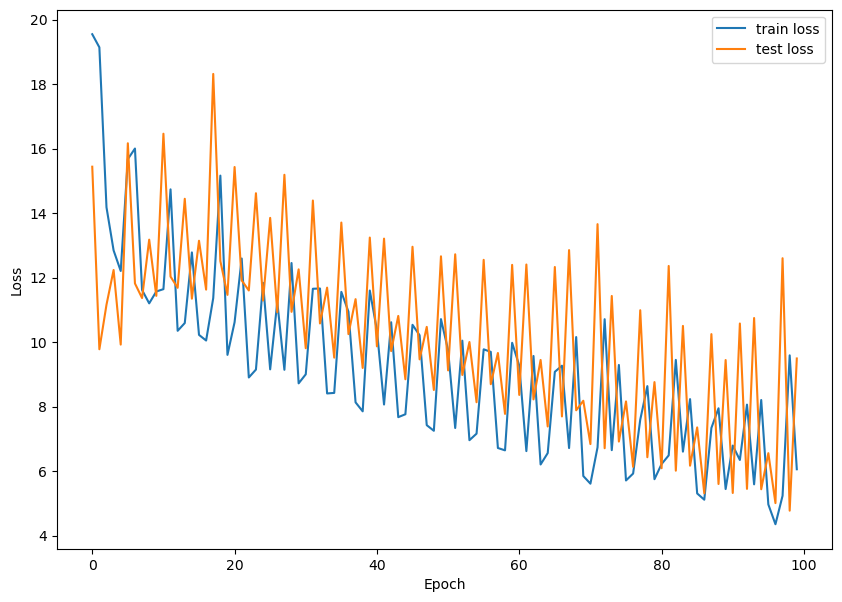

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

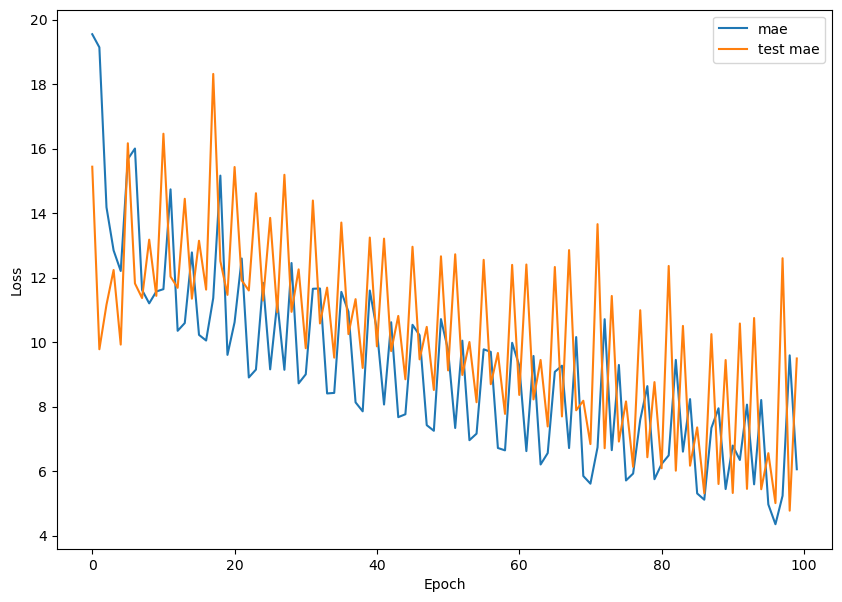

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 50ms/step - loss: 9.4928 - mae: 9.4928
